# Проект: Анализ оттока клиентов

**Цель:** Проанализировать клиентов банка и выделить сегменты клиентов, которые склонны уходить из банка.

По итогу исследования мы эффективно выделим сегменты клиентов, чтобы они были однородными, высокоточными и покрывали максимум проблемных зон банка. Это даст понимание маркетинговому отделу на какие сегменты разработать программы воздействия, что приведет к уменьшению оттока.

**Заказчик** — отдел маркетинга.

**Ход выполнения проекта:**

1. Предобработка данных
2. Исследовательский анализ данных
3. Проверка гипотез
4. Выделение и приоритезация сегментов пользователей на основе корреляционного EDA, анализа и проверки гипотез.
5. Выводы и рекомендации.

**Материалы:**
* [Презентация](https://docs.google.com/presentation/d/140xLpF5FIA5dxlJBBP-IwzfZ9mzLN9XNDvReu5ZtZHM/edit?usp=sharing)
* [Дашборд](https://public.tableau.com/views/DashboardMetanPromBank/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st
from scipy.stats import levene
import warnings; warnings.filterwarnings(action = 'ignore')

In [ ]:
try:
    bank_dataset = pd.read_csv('/datasets/bank_dataset.csv')
except:
    bank_dataset = pd.read_csv('*')

In [3]:
display(bank_dataset.head(10))
bank_dataset.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
bank_dataset.isna().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

Пропуски имеются только в столбце баланса, но их много, отсутствуют данные о балансе порядка 37% клиентов банка. Это может быть вызвано сбоем на этапах сбора/выгрузки информации или другими причинами. Природу пропусков мы исследуем дальше.

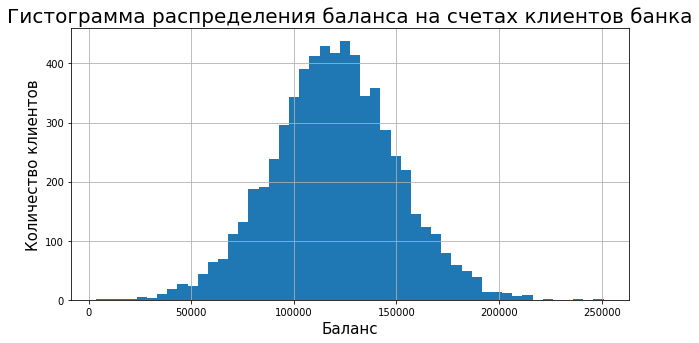

In [5]:
plt.figure(figsize=(10, 5))
bank_dataset['Balance'].hist(bins=50)
plt.title('Гистограмма распределения баланса на счетах клиентов банка', fontsize=20)
plt.xlabel('Баланс', fontsize=15)
plt.ylabel('Количество клиентов', fontsize=15)
plt.show()

Распределение нормальное – это плюс.

Исследуем разницу клиентов с пропусками в балансе и без.

In [6]:
display(round(bank_dataset[bank_dataset['Balance'].isna()].describe().T,2))

display(round(bank_dataset[bank_dataset['Balance'].notna()].describe().T,2))

,count,mean,std,min,25%,50%,75%,max
userid,3617.0,15734685.59,71947.49,15608442.00,15672255.00,15736083.00,15796286.00,15858100.00
score,3617.0,649.45,96.16,350.00,583.00,651.00,717.00,850.00
Age,3617.0,38.43,10.49,18.00,31.00,37.00,43.00,88.00
Objects,3617.0,5.07,2.86,0.00,3.00,5.00,7.00,10.00
Balance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Products,3617.0,1.78,0.50,1.00,1.00,2.00,2.00,4.00
CreditCard,3617.0,0.72,0.45,0.00,0.00,1.00,1.00,1.00
Loyalty,3617.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,3617.0,98983.56,57730.83,90.07,49506.82,98618.79,148330.97,199992.48
Churn,3617.0,0.14,0.35,0.00,0.00,0.00,0.00,1.00


,count,mean,std,min,25%,50%,75%,max
userid,6383.0,15733104.80,71929.13,15608437.00,15670940.00,15732262.00,15795842.00,15858426.00
score,6383.0,651.14,96.93,350.00,584.00,652.00,718.00,850.00
Age,6383.0,39.20,10.48,18.00,32.00,38.00,44.00,92.00
Objects,6383.0,4.98,2.91,0.00,2.00,5.00,8.00,10.00
Balance,6383.0,119827.49,30095.06,3768.69,100181.98,119839.69,139512.29,250898.09
Products,6383.0,1.39,0.58,1.00,1.00,1.00,2.00,4.00
CreditCard,6383.0,0.70,0.46,0.00,0.00,1.00,1.00,1.00
Loyalty,6383.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,6383.0,100717.35,57380.32,11.58,51736.85,101139.30,149596.62,199970.74
Churn,6383.0,0.24,0.43,0.00,0.00,0.00,0.00,1.00


Зависимости "все пропуски относятся к ушедшим клиентам" нет, пропуски в балансе есть и у действующих клиентов.

Существенная разница есть в количестве продуктов. Возможно это клиенты у которых нет баланса из-за специфики продукта, например страховка жизни или авто.

Посмотрим в разрезе по городам.

In [7]:
bank_dataset[bank_dataset['Balance'].isna()]['City'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: City, dtype: int64

В таблице нет пропусков среди клиентов города Ростов Великий. Возможно продукта, в котором нет баланса, нет в данном городе.

Исходя из полученной аналитики касательно пропусков баланса, можно сделать вывод, что это категория пропусков **MNAR** (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, которых нет в нашем датасете, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Проверим датасет на дубликаты.

In [8]:
print('Полных дублей в датасете:', bank_dataset.duplicated().sum(),)
print('Неявных, если сравнивать только идентификатор пользователя:', bank_dataset.duplicated('userid').sum())

Полных дублей в датасете: 0
Неявных, если сравнивать только идентификатор пользователя: 0


Дубликатов нет, это хорошо.

Приведём названия столбцов к нижнему регистру и переименуем для удобства.

In [9]:
bank_dataset.columns = bank_dataset.columns.str.lower()
bank_dataset = bank_dataset.rename(columns={'creditcard': 'credit_card'})
bank_dataset.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

Исходя из задачи, нам не нужны user_id в построении портретов пользователей. Удалим данный столбец.

In [10]:
bank_dataset = bank_dataset.drop(columns = ['userid'],axis = 1)
display(bank_dataset.head(10))

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


**Предобработка завершена:**
   - импортированы библиотеки, загружен датасет, проведено ознакомление с данными
   - найдены пропуски и выдвинуты предположения об их "природе". Решено оставить пропуски "как есть", чтобы не исказить дальнейшие результаты проверки гипотез
   - дубликатов в датасете не найдено
   - названия столбцов приведены к единому стилю
   - удален столбец с id клиентов

## Исследовательский анализ данных

**Кодирование и категоризация данных**

Для дальнейшего анализа необходимо перевести категориальные значения в бинарные. Такие данные находятся в столбцах с половым признаком и городом клиента (gender и city). Так же необходимо выделить категории по возрасту, что бы в дальнейшем работать с группами.

Категоризация возраста

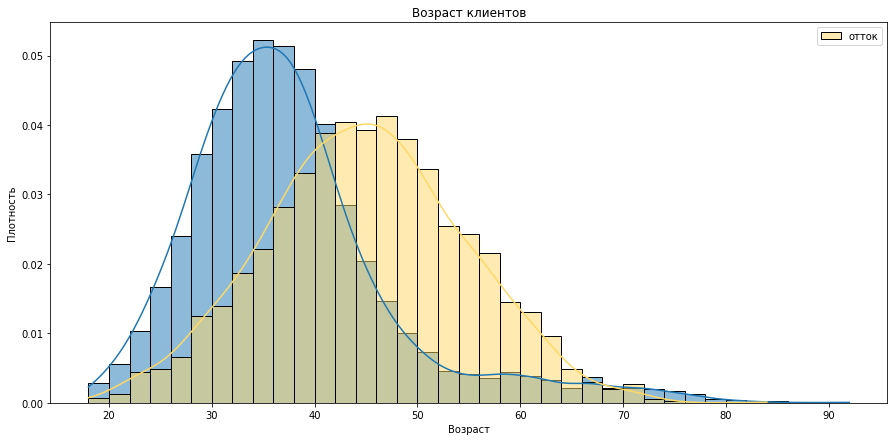

In [11]:
fig, ax = plt.subplots(figsize = (15, 7))
w=2
    
sns.histplot(data=bank_dataset[bank_dataset['churn']==0], x='age', kde=True, 
             stat='density', common_norm=False, ax=ax, bins=np.arange (min(bank_dataset.age), max(bank_dataset.age) + w, w))
sns.histplot(data=bank_dataset[bank_dataset['churn']==1], x='age', label = 'отток', color = '#FFD966', kde=True, 
             stat='density', common_norm=False, ax=ax, alpha=.5, bins=np.arange (min(bank_dataset.age), max(bank_dataset.age) + w, w))

plt.ylabel('Плотность')
plt.xlabel('Возраст')
plt.legend()
plt.title('Возраст клиентов')
plt.show();

Основная отточная категория клиентов от 40 лет. Создадим категории с такими параметрами.

In [12]:
def categorize_age(age):
    try:
        if 18 <= age <= 39:
            return '18-39'
        elif age >= 40:
            return 'after_40'
    except:
        pass

In [13]:
bank_dataset['age_category'] = bank_dataset['age'].apply(categorize_age)

In [14]:
bank_dataset['age_category_2'] = bank_dataset['age_category']

In [15]:
bank_dataset = pd.get_dummies(bank_dataset, columns = ['age_category_2'])
bank_dataset = bank_dataset.rename (columns = (
    {'age_category_2_18-39':'18-39', 'age_category_2_after_40':'after_40'}))

bank_dataset.head()

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,18-39,after_40
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,after_40,0,1
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,after_40,0,1
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,after_40,0,1
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,18-39,1,0
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,after_40,0,1


Категоризация по полу и городу

In [16]:
bank_dataset['city_2'] = bank_dataset['city']
bank_dataset['gender_2'] = bank_dataset['gender']

bank_dataset.head()

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,18-39,after_40,city_2,gender_2
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,after_40,0,1,Ярославль,Ж
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,after_40,0,1,Рыбинск,Ж
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,after_40,0,1,Ярославль,Ж
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,18-39,1,0,Ярославль,Ж
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,after_40,0,1,Рыбинск,Ж


In [17]:
bank_dataset = pd.get_dummies(bank_dataset, columns = ['city_2', 'gender_2'])
bank_dataset = bank_dataset.rename(columns = (
    {'city_2_Ростов Великий':'Ростов Великий', 'city_2_Рыбинск':'Рыбинск','city_2_Ярославль':'Ярославль', 
     'gender_2_Ж':'female', 'gender_2_М':'male'}))

bank_dataset.head()

,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category,18-39,after_40,Ростов Великий,Рыбинск,Ярославль,female,male
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,after_40,0,1,0,0,1,1,0
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,after_40,0,1,0,1,0,1,0
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,after_40,0,1,0,0,1,1,0
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,18-39,1,0,0,0,1,1,0
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,after_40,0,1,0,1,0,1,0


Категоризацию закончили. 

Приступим к анализу и проверим корреляцию столбцов с контрольным показателем факта ухода клиента.

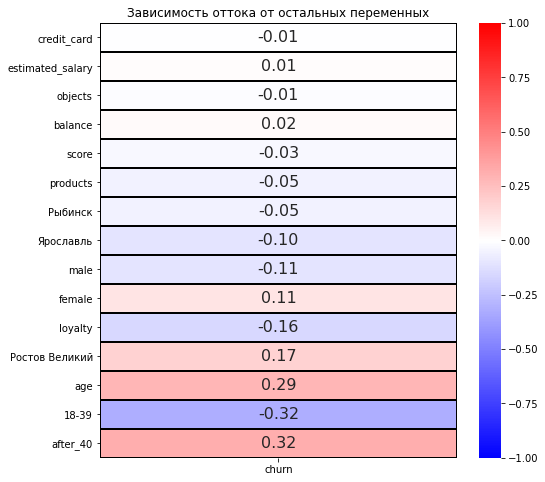

In [18]:
plt.figure(figsize=(8, 8))

sns.heatmap(
    bank_dataset.corr()[['churn']].drop('churn').sort_values('churn', key=abs),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='bwr',
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    annot_kws={'size':16}
)

plt.title('Зависимость оттока от остальных переменных')
plt.show()

Корреляционный анализ показал, что на факт оттока наиболее влияют следующие параметры:
 - возраст клиента
 - город
 - активность клиента
 - пол
 
Оценка силы связи по шкале Чеддока сортирована от умеренной до слабой.

Посмотрим на средние значения признаков в двух группах. Кто ушел - 1 и кто остался - 0.

In [19]:
round(bank_dataset.groupby('churn').agg('mean').T, 2)

churn,0,1
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,119535.86,120746.97
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68
18-39,0.68,0.29
after_40,0.32,0.71


- у тех, кто остался, скоринговый балл немного выше
- средний возраст ушедших клиентов - 45 лет, у оставшихся - 37 лет
- активность оставшихся клиентов выше

Наличие кредитной карты, количество объектов в собственности, остаток средств на балансе и ЗП на отток существенного влияния не оказывают (в обеих группах показатели практически одинаковы)

Благодаря категоризации и бинаризации мы можем взглянуть на данные немного ближе и увидеть следующие особенности:
- основной отток происходит у клиентов в возрасте 40+ лет. Более младшая категория клиентов уходит гораздо реже
- отток клиентов из Ростов Великий выше, чем в остальных городах
- у женщин отток выше чем у мужчин

Расчитаем средний уровень оттока.

In [20]:
mean_churn = round(len(bank_dataset.query('churn==1'))/len(bank_dataset), 2)

Создадим функции для автоматизации получения графиков.

In [21]:
def numeric_plots(data, col, title, w):
    fig, ax = plt.subplots(figsize = (15, 7))
    w=w
    
    sns.histplot(data=data[data['churn']==0][col], stat='density', common_norm=False, 
                 bins=np.arange (min(data[col]), max(data[col]) + w, w), ax=ax)
    sns.histplot(data=data[data['churn']==1][col], label='отток', color='#FFD966', stat='density', common_norm=False, 
                 bins=np.arange (min(data[col]), max(data[col]) + w, w), ax=ax, alpha=.5)

    plt.xlabel('')
    plt.ylabel('Плотность пользователей')
    plt.legend()
    
    fig.suptitle(title)
    plt.show();

In [22]:
def categorical_plots(data, col, title):
    fig, ax = plt.subplots(figsize = (15, 7))

    sns.barplot(x=col, data=data, y='churn', ci=None, palette='Blues_d', ax=ax)
    plt.ylabel('Уровень оттока')
    plt.xlabel('')
    
    plt.axhline(y=mean_churn, linewidth=3, color='r')
    fig.suptitle(title)
    plt.show()

In [23]:
numeric = pd.DataFrame({'col' : ['score', 'age', 'estimated_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Заработная плата клиента'], 
                        'w' : [10, 2, 5000]
                       })

categorical = pd.DataFrame({'col' : ['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty'],
                            'title' : ['Город', 'Пол', 'Количество объектов в собственности', 
                                       'Количество продуктов банка', 'Наличие кредитной карты', 'Активность']
                            })

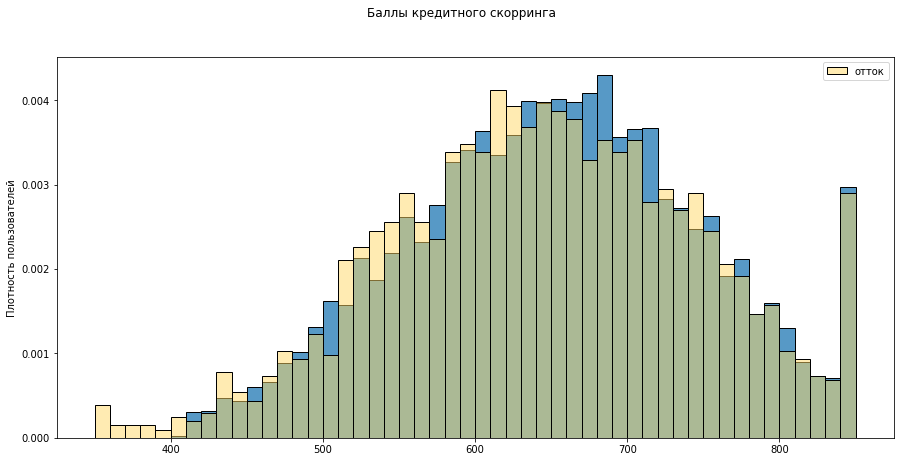

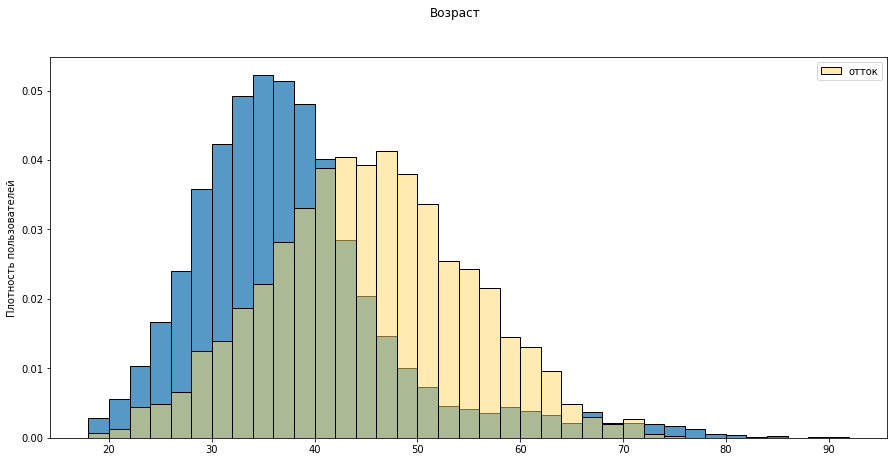

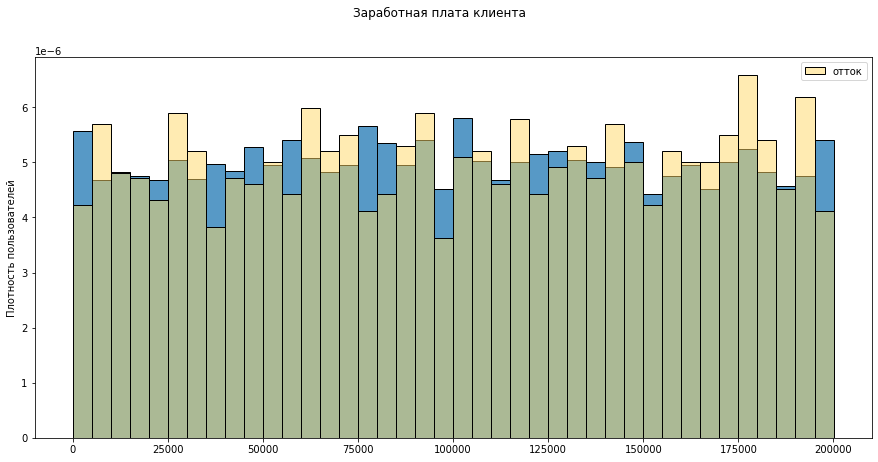

In [24]:
for index, row in numeric.iterrows():
    numeric_plots(bank_dataset, row[0], row[1], row[2])

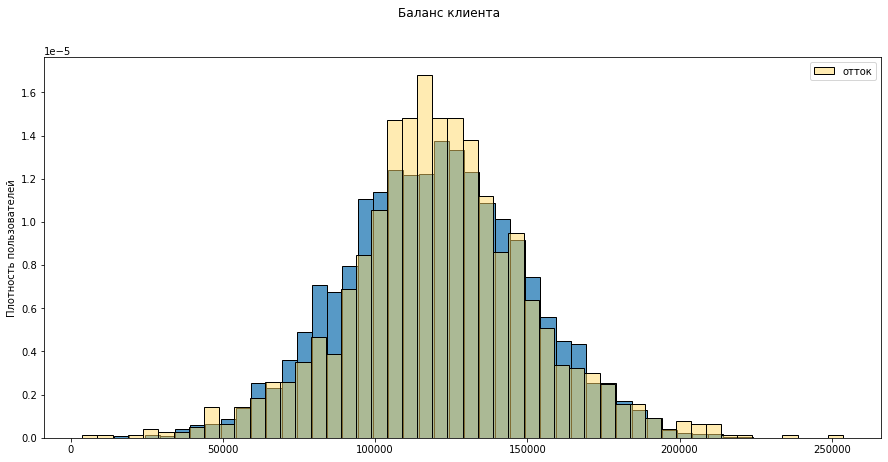

In [25]:
fig, ax = plt.subplots(figsize = (15, 7))

sns.histplot(data=bank_dataset[bank_dataset['churn']==0]['balance'], 
             stat='density', common_norm=False, bins=50, binwidth=5000, ax=ax)
sns.histplot(data=bank_dataset[bank_dataset['churn']==1]['balance'], label='отток', color='#FFD966', 
             stat='density', common_norm=False, bins=50, binwidth=5000, ax=ax, alpha=.5)

plt.xlabel('')
plt.ylabel('Плотность пользователей')
plt.legend()
    
fig.suptitle('Баланс клиента')
plt.show();

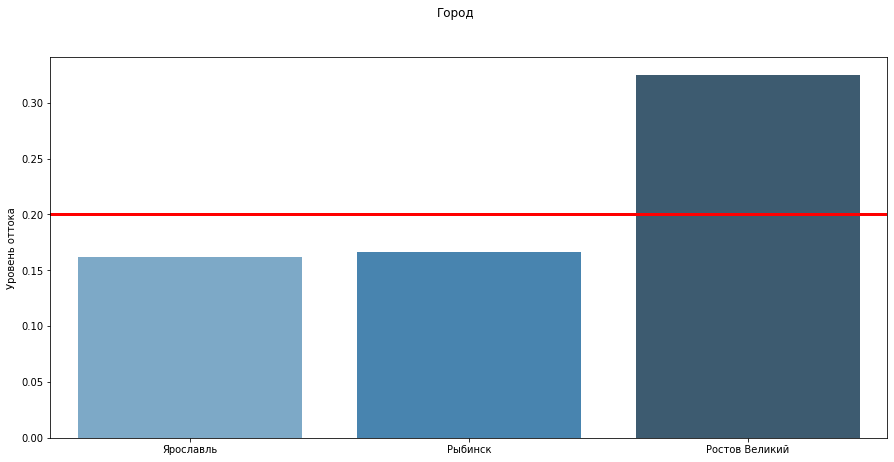

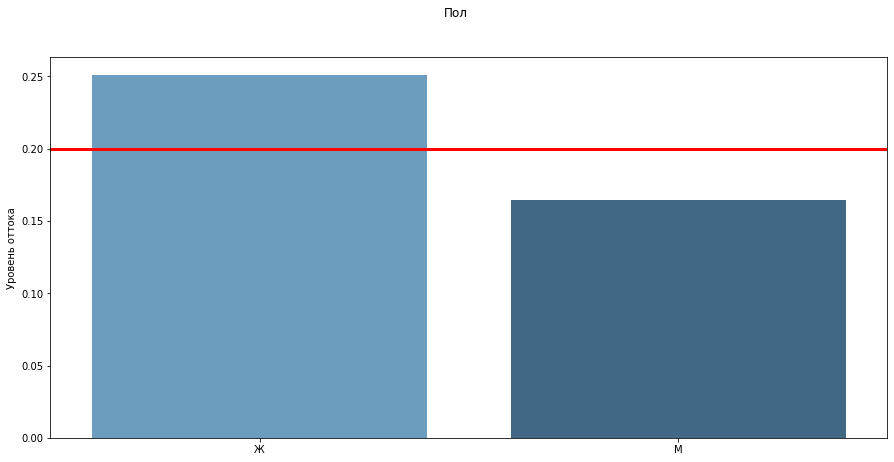

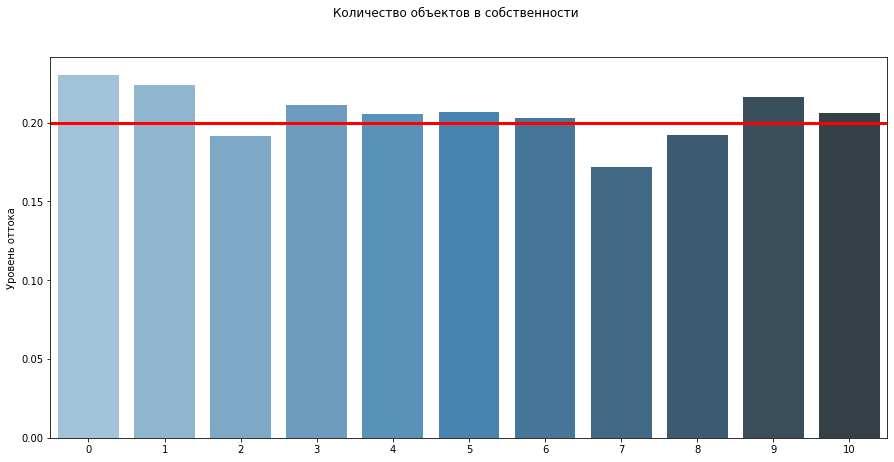

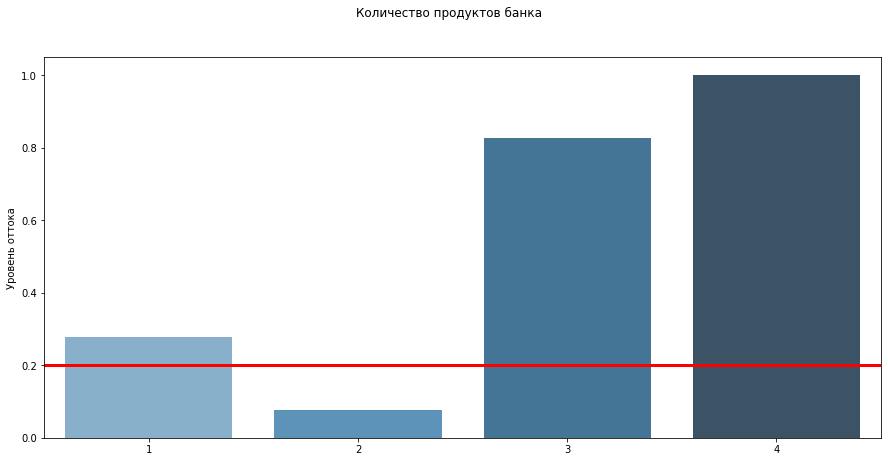

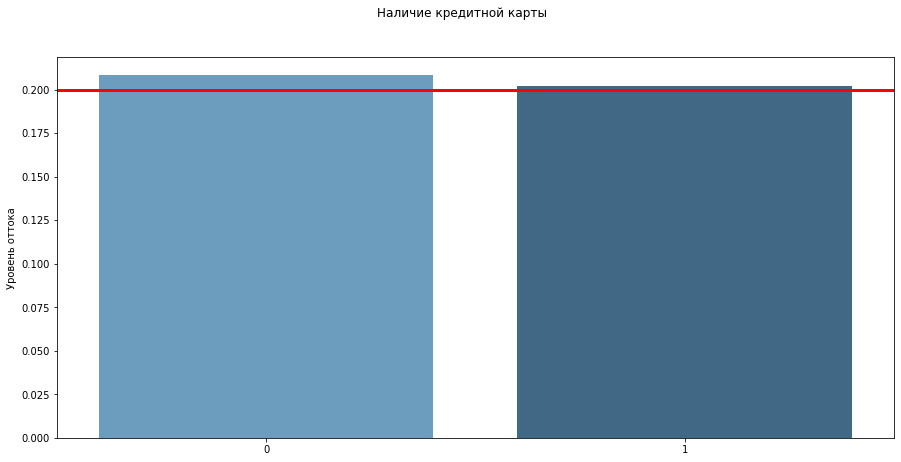

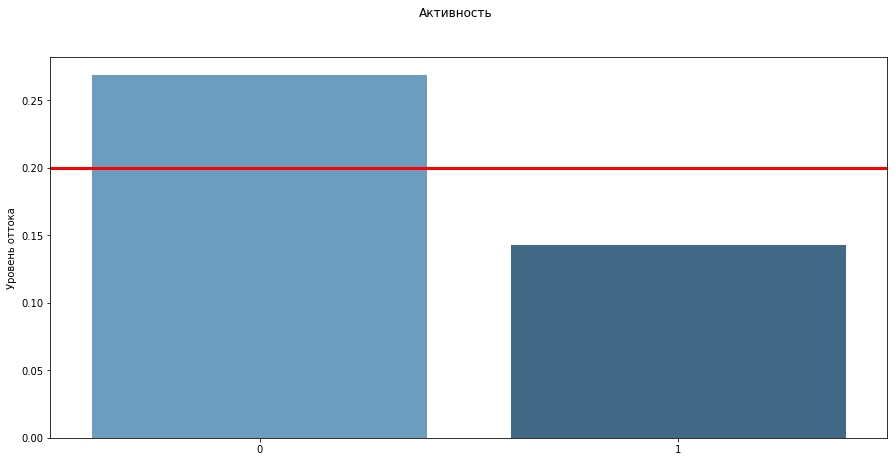

In [26]:
for index, row in categorical.iterrows():
    categorical_plots(bank_dataset, row[0], row[1])

Выводы из графического анализа в разрезе ушедших клиентов:

- **кредитный скорринг** действующих клиентов более смещён в сторону увеличения, сосредоточен у показателя ~765 очков и имеет "ступеньку" на ~840 очках. Среди ушедших клиентов заметна более пологая кривая в сторону увеличения показателя.
- в **городе** Ростов Великий уровень ушедших сильно выше среднего. 
- мы помним, что распределение клиентов по **половому** признаку было в пользу мужчин, но среди ушедших клиентов оказалось больше женщин.
- анализ по **возрасту** показывает, что более молодые клиенты чаще остаются в банке, тогда как возрастные чаще прекращают обслуживаться по тем или иным причинам.
- **баланс** ушедших клиентов более "сгруппирован" в районе отметки в 120 тыс.
- распределение по **продуктам** банка выглядит так, что средний уровень оттока ниже только для клиентов с 2 продуктами.
- зависимости межу уходом из банка и фактом использования **кредитной карты** среди клиентов нет. Пропорции одинаковые.
- **не активные** клиенты чаще уходили из банка. Среди действующих клиентов достаточно не активных, хорошо бы успеть перевести их в статус активных.

## Проверка гипотез

Далее мы напишем функцию для проведения проверки гипотез. При условии что у нас есть достаточно большое количество наблюдений мы можем применять ttest даже в выборках с распределением, отличным от нормального.

Проверять будем гипотезы о равенстве:
1. уровня дохода
2. возрасте клиента
3. количестве используемых продуктов банка
4. активности

In [27]:
ALPHA = .05

def hypo(col):
    p1 = bank_dataset[bank_dataset['churn'] == True][col]
    p2 = bank_dataset[bank_dataset['churn'] == False][col]
    
    results = st.ttest_ind(p1, p2)
    print('p-value = {:.5f}'.format(results.pvalue))
    
    if results.pvalue < ALPHA:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Приступим к проверке гипотез. Первым делом проверим уровни дохода:
- **Нулевая гипотеза:** уровень дохода ушедших клиентов равен среднему уровню дохода оставшихся клиентов.
- **Альтернативная гипотеза:** уровень дохода ушедших клиентов отличается от среднего уровня дохода оставшихся клиентов.

In [28]:
hypo('estimated_salary')

p-value = 0.22644
Не получилось отвергнуть нулевую гипотезу


Статистический тест показал, что различий в уровне дохода среди ушедших и оставшихся клиентов нет. Следовательно, этот показатель не стоит учитывать при разборе причин оттока.

Проверим возраст отточных и действующих клиентов:
- **Нулевая гипотеза:** возраст ушедших клиентов равен среднему возрасту оставшихся клиентов.
- **Альтернативная гипотеза:** возраст ушедших клиентов отличается от среднего возраста оставшихся клиентов.

In [29]:
hypo('age')

p-value = 0.00000
Отвергаем нулевую гипотезу


Возраст групп не равен, то есть можно говорить о существенном отличии возраста. Из графиков ранее было видно, что смещение в сторону молодых клиентов.

Исследуем стили потребления, сравнив количество используемых продуктов банка:
- **Нулевая гипотеза:** показатель используемых продуктов банка ушедших клиентов равен показателю используемых продуктов оставшихся клиентов.
- **Альтернативная гипотеза:** показатель используемых продуктов банка ушедших клиентов отличается от показателя используемых продуктов оставшихся клиентов.

In [30]:
hypo('products')

p-value = 0.00000
Отвергаем нулевую гипотезу


Количество используемых продуктов исследуемыми группами не равно. То есть, стиль потребления продуктов банка у отточных и действующих отличается. Повторимся, что банку следует пересмотреть матрицу продуктов, отсеять убыточные и генерирующие отток и сконцентрироваться на продвижении двух-трёх основных продуктов.

Исходя из графического анализа, уровень активности также будет отличаться:
- **Нулевая гипотеза:** уровень активности ушедших клиентов равен уровню активности оставшихся клиентов.
- **Альтернативная гипотеза:** уровень активности ушедших клиентов отличается от уровня активности оставшихся клиентов.

In [31]:
hypo('loyalty')

p-value = 0.00000
Отвергаем нулевую гипотезу


Активность отличается. Как говорили ранее, одна из задач банка – повышать уровень активности клиентов, такие клиенты реже разрывают отношения с банком.

## Выделение и приоритезация сегментов пользователей

### Выделение сегментов

По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.

В качестве критериев для выделения выберем следующие параметры:

1. пол
2. возраст
3. количество используемых продуктов
4. активность
5. город

Определим размер отточных клиентов.

In [32]:
churn = len(bank_dataset[bank_dataset['churn'] == 1])

**Сегмент 1:**

- пол - женский
- возраст - 40+
- активность - не активный

In [33]:
segment1 = bank_dataset.query('gender == "Ж" and after_40 == 1 and loyalty == 0')
segment1_churn = bank_dataset.query('gender == "Ж" and after_40 == 1 and loyalty == 0 and churn == 1')


print('Размер сегмента:', len(segment1))
print('Количество оттока сегмента:', len(segment1_churn))
print('Процент оттока сегмента:', round(len(segment1_churn)/len(segment1)*100,2), '%')
print('Процент оттока:', round(len(segment1_churn)/churn*100,2), '%')

Размер сегмента: 938
Количество оттока сегмента: 511
Процент оттока сегмента: 54.48 %
Процент оттока: 25.09 %


**Сегмент 2:**

- пол - мужской
- возраст - 40+
- количество используемых продуктов - 1

In [34]:
segment2_churn = bank_dataset.query('gender == "М" and after_40 == 1 and products == 1 and churn == 1')
segment2 = bank_dataset.query('gender == "М" and after_40 == 1 and products == 1')

print('Размер сегмента:', len(segment2))
print('Количество оттока сегмента:', len(segment2_churn))
print('Процент оттока сегмента:', round(len(segment2_churn)/len(segment2)*100,2), '%')
print('Процент оттока:', round(len(segment2_churn)/churn*100,2), '%')

Размер сегмента: 1177
Количество оттока сегмента: 470
Процент оттока сегмента: 39.93 %
Процент оттока: 23.07 %


**Сегмент 3:**

- город - Ростов Великий
- возраст - 40+
- количество используемых продуктов - 1

In [35]:
segment3_churn = bank_dataset.query('city == "Ростов Великий" and after_40 == 1 and products == 1 and churn == 1')
segment3 = bank_dataset.query('city == "Ростов Великий" and after_40 == 1 and products == 1')

print('Размер сегмента:', len(segment3))
print('Количество оттока сегмента:', len(segment3_churn))
print('Процент оттока сегмента:', round(len(segment3_churn)/len(segment3)*100,2), '%')
print('Процент оттока:', round(len(segment3_churn)/churn*100,2), '%')

Размер сегмента: 660
Количество оттока сегмента: 411
Процент оттока сегмента: 62.27 %
Процент оттока: 20.18 %


**Сегмент 4:**

- город - Ярославль
- возраст - 40+
- количество используемых продуктов - 1

In [36]:
segment4_churn = bank_dataset.query('city == "Ярославль" and after_40 == 1 and products == 1 and churn == 1')
segment4 = bank_dataset.query('city == "Ярославль" and after_40 == 1 and products == 1')

print('Размер сегмента:', len(segment4))
print('Количество оттока сегмента:', len(segment4_churn))
print('Процент оттока сегмента:', round(len(segment4_churn)/len(segment4)*100,2), '%')
print('Процент оттока:', round(len(segment4_churn)/churn*100,2), '%')

Размер сегмента: 1036
Количество оттока сегмента: 416
Процент оттока сегмента: 40.15 %
Процент оттока: 20.42 %


### Приоритезация сегментов

Расположим приоритет сегментов по убыванию количества отточных клиентов:

1. **Сегмент 1:**

- пол - женский
- возраст - 40+
- количество используемых продуктов - 1

Показатели отточности:
- Размер сегмента: 938
- Количество оттока сегмента: 511
- Процент оттока сегмента: 54.48 %
- Процент оттока: 25.09 %

2. **Сегмент 2:**

- пол - мужской
- возраст - 40+
- количество используемых продуктов - 1

Показатели отточности:
- Размер сегмента: 1177
- Количество оттока сегмента: 470
- Процент оттока сегмента: 39.93 %
- Процент оттока: 23.07 %

3. **Сегмент 3:**

- город - Ростов Великий
- возраст - 40+
- количество используемых продуктов - 1

Показатели отточности:
- Размер сегмента: 660
- Количество оттока сегмента: 411
- Процент оттока сегмента: 62.27 %
- Процент оттока: 20.18 %

4. **Сегмент 4:**

- город - Ярославль
- возраст - 40+
- количество используемых продуктов - 1

Показатели отточности:
- Размер сегмента: 1036
- Количество оттока сегмента: 416
- Процент оттока сегмента: 40.15 %
- Процент оттока: 20.42 %

Если рассматривать приоритизацию из расчета доли отточных клиентов, то порядок будет немного другой:
1. **Сегмент 1**
2. **Сегмент 2**
3. **Сегмент 4**
4. **Сегмент 3**

## Выводы и рекомендации

**В ходе исследования мы:**
1. импортировали библиотеки, ознакомились с данным;
2. предобработав данные, нашли пропуски в графе баланса клиентов, которые не стали заполнять, но на выводы это не повлияло. Дубликатов в датасете не найдено;
3. на этапе исследовательского анализа данных были получены интересные выводы и вот некоторые из них:
   - данные имеют нормальное распределение;
   - в Ростове Великом доля оттока выше, чем в других городах. Эта проблема требует дополнительного исследования и, скорее всего, увеличения представительства банка в городе;
   - женщины чаще разрывают отношения с банком. Одним из мероприятий, уменьшающих отток женской аудитории, может быть увеличение количества женских образов в рекламной камипании банка;
   - **возраст** – это фактор, наиболее сильно влияющий на отток клиентов. Проверка гипотезы показала, что средний возраст бывших клиентов отличается от текущих в сторону увеличения. Другими словами, банк теряет возрастную аудиторию. Этот вопрос так же требует дополнительных исследований. Одним из мероприятий может быть льготное обслуживание или простая программа лояльности;
   - анализ количества используемых клиентом продуктов банка позволяет сделать вывод, что наиболее выгодный формат – 1-2 продукта. Если клиенты используют 3-4 продукта, они, скорее всего, остануться недовольны и уйдут. Банку следует проанализировать матрицу продукта, отбросить неэффективные и сконцентрироваться на продвижении основных простых популярных у аудитории продуктов;
   - корреляционный анализ показал, что **активность** – второй по значимости фактор, влияющий на отток. Из статистической проверки гипотез следует, что средний показатель лояльности отличается у действующих и бывших клиентов. Тут банку так же следует провести дополнительные исследования, определить наиболее выгодные пути повышения лояльности аудитории и завоёвывать доверие клиента, т.к. лояльные клиенты прекращали обслуживание реже.
4. проверка гипотез t-критериями показала, что уровень дохода бывших и действующих клиентов не отличается, тогда как возраст, стиль потребления продуктов банка и активность клиентов имеют значимые отличия. Следовательно, чтобы уменьшить отток клиентов, банку необходимо глубже анализировать именно эти показатели и эффективно реагировать проводимыми кампаниями на показатель удовлетворённости и оттока клиентов.

**Рекомендации для отдела маркетинга:**

**Сегмент 1:**
- пол - женский
- возраст - 40+
- количество используемых продуктов - 1

Рекомендации:
- больше использовать женские образы в рекламных кампаниях
- предложить повышенный кешбек на косметику, товары для дома и услуги салонов красоты
- льготное обслуживание или простая программа лояльности
- прислать рассылку с популярными услугами или форму для заполнения на предодобренную кредитную карту с небольшим лимитом


**Сегмент 2:**
- пол - мужской
- возраст - 40+
- количество используемых продуктов - 1

Рекомендации:
- предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки
- предложить специальные условия по страхованию объектов собственности
- льготное обслуживание или простая программа лояльности
- прислать рассылку с популярными услугами или форму для заполнения на предодобренную кредитную карту с небольшим лимитом


**Сегмент 3:**
- город - Ростов Великий
- возраст - 40+
- количество используемых продуктов - 1

Рекомендации:
- увеличить количество банкоматов и отделений банков
- льготное обслуживание или простая программа лояльности
- прислать рассылку с популярными услугами или форму для заполнения на предодобренную кредитную карту с небольшим лимитом


**Сегмент 4:**
- город - Ярославль
- возраст - 40+
- количество используемых продуктов - 1

Рекомендации:
- система скидок в местных сетевых магазинах
- льготное обслуживание или простая программа лояльности
- прислать рассылку с популярными услугами или форму для заполнения на предодобренную кредитную карту с небольшим лимитом